<a href="https://colab.research.google.com/github/priyalimbu246/assignments/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chemical Applications of Machine Learning (CHEM 4930/5610) - Spring 2026

### Assignment 2 - Deadline 2/3/2026
Points 10

#### General Comments
All figures and graph should have approriate labels on the two axis, and should include a legend with appropriate labels of the different plots.

The notebook should be return in working format. That is, I should be able to reset all the output and re-run all the cells and get the same results as you obtained.

**You should start by saving a copy of the notebook to your Google Drive so you preserve all changes.**

**Please add your name as a suffix to the filname**

**Student Name**: Priya N. Limbu

**AI usage statement:**
I have extensively used ChatGpt and perplexicity as well as gemini for better and compact coding. I have used ChatGpt for understanding of codes and for fixing errors as well.

### Task 1 - 10 points

In this task, we will consider the Bradley Melting Point Dataset, which is curated chemical dataset with melting points of around 3,000 chemical compounds, see [here](https://www.kaggle.com/datasets/aliffaagnur/melting-point-chemical-dataset/data).

This dataset is stored in a comma-separated values (csv) file, which is common format used to start data in text files. We can load this into a pandas DataFrame using the `load_csv` function.

In this dataset, we have the compounds names, SMILES strings, and the melting point in Celsius.

#### A)
Identify in the dataset the chemical compounds with the 5 lowest melting points and 5 highest melting points and visualize their 2D chemical structure using RDKit and the [mols2grid package](https://mols2grid.readthedocs.io/en/latest/), where you display the melting point values on the grid, see [here](https://colab.research.google.com/github/PatWalters/practical_cheminformatics_tutorials/blob/main/fundamentals/A_Whirlwind_Introduction_To_The_RDKit.ipynb#scrollTo=N3CR7rMF3sg7) for an example of the usage of mols2grid.

#### B)
Calculate the following properties for the molecules using RDKIt:
- The molecular weight
- The number of heavy atoms
- Number of hydrogen bond acceptors
- Number of hydrogen bond donors
- [Octanol-water partition coefficient - LogP](https://pubs-acs-org.libproxy.library.unt.edu/doi/10.1021/ci990307l)
- [Topological polar surface area (TPSA) descriptor](https://pubs-acs-org.libproxy.library.unt.edu/doi/abs/10.1021/jm000942e)
- Topological polar surface area (TPSA) descriptor, including S and P atoms, see [here](https://www.rdkit.org/docs/RDKit_Book.html#implementation-of-the-tpsa-descriptor)

Note: for some of the molecules, the TPSA descriptor will give a value of zero. When doing any analysis for the TPSA descriptor, you should ignore these values.

#### C)
Write out to a new csv file values of all the properties calculated in B) along with the compound names, SMILES strings, and the melting point in Celsius. Here, when writing this file, you should ignore any compounds where the SMILES conversion did not work correctly.

#### D)
Perform a linear regression analysis using scikit-learn where you look at the correlation of each of the properties calculated in B) with melting temperature. Here, each property should be considered individually.

To avoid outliers, filter out (i.e., remove) the compounds with the lowest 10% and the highest 10% melting temperature. Make a histogram that shows this filtering. Furthermore, for each property, filter out the compounds with lowest 10% and highest 10% values (again making a histogram that shows this filtering). Only consider the joint remaining compounds in your linear regression analysis for each property.

When performing the linear regression, employ a 70%/30% training/test split.

Calculate the coefficient of determination, $R^2$, for both the training dataset and the test dataset and report both.

You should make figure that shows the data along with the linear curve coming from the linear regression. In the figure, it should be clear which data points are in the training and test set (e.g., by having them in different colors). Include the $R^2$ values on the figure.

From your analysis, which of the properties correlates best with the melting temperature?

#### E)
For two of the properties from D) (e.g., the ones that correlate best with the melting point), perform [RANSAC](https://en.wikipedia.org/wiki/Random_sample_consensus) regression, which is method that takes outliers into account when performing linear regression and does not include them in the final modeling, see [here](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html).

In the figure, it should be clear which data points are in inlier set and which are in the outlier set (e.g., by showing them in different colors).


In [305]:
# Bash script to download all the dataset. Don't worry if you don't understand it
%%bash

url="https://raw.githubusercontent.com/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/refs/heads/main/Assignment-2/"
dataset_filename="BradleyDoublePlusGoodMeltingPointDataset.csv"

rm -f ${dataset_filename}

wget ${url}/${dataset_filename} &> /dev/null

ls

Bradley_Dataset_with_RDKit_Descriptors.csv
BradleyDoublePlusGoodMeltingPointDataset.csv
Bradley_RDKit_descriptors_clean.csv
Dataset_RotatedWQ-Potential.data
sample_data


##A

In [306]:
!pip install rdkit mols2grid &> /dev/null

import pandas as pd
from rdkit import Chem
from mols2grid import display
import numpy as np


In [307]:
df=pd.read_csv('BradleyDoublePlusGoodMeltingPointDataset.csv')

In [308]:
df.head(10)

,key,name,smiles,mpC,csid,link,source,count,min,max,range
0,27956,cyclobutylmethane,C1(CCC1)C,-161.51,11232,http://pubs.acs.org/doi/abs/10.1021/ja01142a048,Lemaire HP; Livingston RL Journal of the Ameri...,2,-161.51,-161.50,0.01
1,16005,Nitrogen oxide,[O-][N+]#N,-90.80,923,http://msds.chem.ox.ac.uk/,academic website,2,-90.81,-90.80,0.01
2,16127,Sulfuryl difluoride,FS(F)(=O)=O,-135.80,16647,http://msds.chem.ox.ac.uk/,academic website,2,-135.82,-135.80,0.02
3,17138,disopyramide,CC(C)N(CCC(c1ccccn1)(c2ccccc2)C(N)=O)C(C)C,94.80,3002,http://dx.doi.org/10.1021/ci700307p,Hughes LD; Palmer DS; Nigsch F and Mitchell JB...,2,94.75,94.80,0.05
4,15628,Bromine,BrBr,-7.20,22817,http://msds.chem.ox.ac.uk/,academic website,2,-7.25,-7.20,0.05
5,16624,Lomefloxacin,O=C(O)C2=CN(CC)c1c(F)c(c(F)cc1C2=O)N3CC(C)NCC3,239.75,3811,http://www.drugbank.ca/drugs/DB00978,DrugBank,3,239.75,239.80,0.05
6,15962,"N,N-Dimethylmethanamine",CN(C)C,-117.00,1114,http://msds.chem.ox.ac.uk/,academic website,2,-117.08,-117.00,0.08
7,16135,Tetrachloromethane,ClC(Cl)(Cl)Cl,-23.00,5730,http://msds.chem.ox.ac.uk/,academic website,8,-23.00,-22.92,0.08
8,15862,Iodine,II,113.50,785,http://msds.chem.ox.ac.uk/,academic website,2,113.50,113.60,0.10
9,15571,Acetylene,C#C,-80.80,6086,http://msds.chem.ox.ac.uk/,academic website,2,-80.80,-80.70,0.10


In [309]:
df.describe()

,key,mpC,csid,count,min,max,range
count,3041.000000,3041.000000,3.041000e+03,3041.000000,3041.000000,3041.000000,3041.000000
mean,10771.570865,62.848159,2.027796e+06,2.798422,62.229536,63.879092,1.649556
std,6875.518120,96.007422,5.474893e+06,1.275456,95.877685,96.229485,1.293567
min,10.000000,-188.000000,1.800000e+01,2.000000,-188.000000,-187.600000,0.010000
25%,5148.000000,5.000000,7.634000e+03,2.000000,4.800000,5.600000,0.500000
50%,13103.000000,64.000000,1.282900e+04,2.000000,62.750000,65.000000,1.000000
75%,15269.000000,129.500000,6.675900e+04,3.000000,129.000000,130.800000,2.500000
max,28644.000000,438.000000,2.142902e+07,16.000000,437.300000,440.000000,5.000000


In [310]:
df_sorted=df.sort_values(by='mpC')

In [311]:
df_sorted.head()

,key,name,smiles,mpC,csid,link,source,count,min,max,range
375,16083,Propane,CCC,-188.00,6094,http://msds.chem.ox.ac.uk/,academic website,3,-188.00,-187.60,0.40
102,16080,Prop-1-ene,C=CC,-185.00,7954,http://msds.chem.ox.ac.uk/,academic website,4,-185.20,-185.00,0.20
303,15635,But-1-ene,C=CCC,-185.00,7556,http://msds.chem.ox.ac.uk/,academic website,3,-185.35,-185.00,0.35
345,16142,Tetrafluoromethane,FC(F)(F)F,-184.00,6153,http://msds.chem.ox.ac.uk/,academic website,2,-184.00,-183.60,0.40
821,28073,ethane,CC,-183.33,6084,http://pubs.acs.org/doi/pdf/10.1021/je60044a013,Burnett LJ; Muller BH Journal of Chemical and ...,5,-183.33,-182.78,0.55


In [312]:
lowest_mp_compounds=df_sorted.head(5)

In [313]:
lowest_mp_compounds.head()

,key,name,smiles,mpC,csid,link,source,count,min,max,range
375,16083,Propane,CCC,-188.00,6094,http://msds.chem.ox.ac.uk/,academic website,3,-188.00,-187.60,0.40
102,16080,Prop-1-ene,C=CC,-185.00,7954,http://msds.chem.ox.ac.uk/,academic website,4,-185.20,-185.00,0.20
303,15635,But-1-ene,C=CCC,-185.00,7556,http://msds.chem.ox.ac.uk/,academic website,3,-185.35,-185.00,0.35
345,16142,Tetrafluoromethane,FC(F)(F)F,-184.00,6153,http://msds.chem.ox.ac.uk/,academic website,2,-184.00,-183.60,0.40
821,28073,ethane,CC,-183.33,6084,http://pubs.acs.org/doi/pdf/10.1021/je60044a013,Burnett LJ; Muller BH Journal of Chemical and ...,5,-183.33,-182.78,0.55


In [314]:
print(lowest_mp_compounds[["name", "mpC","smiles"]])


                   name     mpC     smiles
375             Propane -188.00        CCC
102          Prop-1-ene -185.00       C=CC
303           But-1-ene -185.00      C=CCC
345  Tetrafluoromethane -184.00  FC(F)(F)F
821              ethane -183.33         CC


In [315]:
highest_mp_compounds  = df_sorted.tail(5) # sorted function lose the indices but partition function you won't lose the indices

In [316]:
highest_mp_compounds.head()

,key,name,smiles,mpC,csid,link,source,count,min,max,range
2639,16452,Diazoxide,Clc1ccc2NC(C)=NS(=O)(=O)c2c1,330.5,2911,http://www.drugbank.ca/drugs/DB01119,DrugBank,3,327.2,330.5,3.3
2952,14146,isophthalic_acid,OC(=O)c1cccc(c1)C(=O)O,342.0,8182,http://www.amazon.com/dp/B003XEQTLE,Aldrich Chemical Company; Aldrich Catalog-Hand...,2,342.0,347.0,5.0
482,1510,"2,4-dihydroxypteridine",c1cnc2c(n1)c(=O)[nH]c(=O)[nH]2,348.0,9832,http://www.alfa.com/en/GP100W.pgm?DSSTK=L06732,Alfa Aesar,2,348.0,348.5,0.5
1075,8524,"thiophene-2,5-dicarboxylic acid",c1cc(sc1C(=O)O)C(=O)O,358.0,19099,http://www.alfa.com/en/GP100W.pgm?DSSTK=L10293,Alfa Aesar,2,358.0,359.0,1.0
2384,27941,Coronene,C1=CC2=C3C4=C1C=CC5=C4C6=C(C=C5)C=CC7=C6C3=C(C...,438.0,8761,http://dx.doi.org/10.1016/j.chemosphere.2013.1...,Abraham M.H. and Acree Jr. W.E. The solubility...,4,437.3,440.0,2.7


In [317]:
print(highest_mp_compounds[["name", "mpC","smiles"]])


                                 name    mpC  \
2639                        Diazoxide  330.5   
2952                 isophthalic_acid  342.0   
482            2,4-dihydroxypteridine  348.0   
1075  thiophene-2,5-dicarboxylic acid  358.0   
2384                         Coronene  438.0   

                                                 smiles  
2639                       Clc1ccc2NC(C)=NS(=O)(=O)c2c1  
2952                             OC(=O)c1cccc(c1)C(=O)O  
482                      c1cnc2c(n1)c(=O)[nH]c(=O)[nH]2  
1075                              c1cc(sc1C(=O)O)C(=O)O  
2384  C1=CC2=C3C4=C1C=CC5=C4C6=C(C=C5)C=CC7=C6C3=C(C...  


In [318]:
from rdkit import Chem

# Create mol column from smiles (you need this for mols2grid)
df["mol"] = df["smiles"].apply(Chem.MolFromSmiles)

# Remove failed SMILES
df = df[df["mol"].notnull()].reset_index(drop=True)

print("mol column created. Shape:", df.shape)


[22:10:47] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[22:10:47] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[22:10:47] Can't kekulize mol.  Unkekulized atoms: 24 25 26 27 28 31 32 33 34
[22:10:47] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[22:10:47] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[22:10:47] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[22:10:47] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
[22:10:47] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
[22:10:47] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[22:10:47] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8


mol column created. Shape: (3025, 12)


[22:10:48] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[22:10:48] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[22:10:48] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 12 13 14 15 16
[22:10:48] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[22:10:48] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[22:10:48] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9


In [319]:
import mols2grid

# Get 5 lowest + 5 highest melting points
df_sorted = df.sort_values("mpC")
extremes = pd.concat([df_sorted.head(5), df_sorted.tail(5)])

# Visualize with structures + melting points
mols2grid.display(
    extremes,
    mol_col="mol",
    subset=["name", "mpC"],  # shows under each molecule
    n_cols=5
)


In [320]:
import mols2grid

# Get 5 lowest melting points
lowest5 = df.nsmallest(5, "mpC")

print("5 LOWEST Melting Points:")
print(lowest5[["name", "mpC"]])

# Visualize structures
mols2grid.display(
    lowest5,
    mol_col="mol",
    subset=["name", "mpC"],
    n_cols=3,
    title="5 Lowest Melting Points"
)


5 LOWEST Melting Points:
                   name     mpC
373             Propane -188.00
102          Prop-1-ene -185.00
303           But-1-ene -185.00
344  Tetrafluoromethane -184.00
815              ethane -183.33


In [321]:
import mols2grid

# Get 5 highest melting points
highest5 = df.nlargest(5, "mpC")

print("5 Highest Melting Points:")
print(highest5[["name", "mpC"]])

# Visualize structures
mols2grid.display(
    highest5,
    mol_col="mol",
    subset=["name", "mpC"],
    n_cols=3,
    title="5 Highest Melting Points"
)


5 Highest Melting Points:
                                 name    mpC
2373                         Coronene  438.0
1068  thiophene-2,5-dicarboxylic acid  358.0
480            2,4-dihydroxypteridine  348.0
2937                 isophthalic_acid  342.0
2627                        Diazoxide  330.5


In [322]:
df_sorted = df.sort_values("mpC") #by using iloc

# 5 lowest
lowest5 = df_sorted.iloc[:5][["name", "smiles", "mpC"]] #gives first lowest mpC

# 5 highest
highest5 = df_sorted.iloc[-5:][["name", "smiles", "mpC"]] #gives last highest mpC i.e -5

print(lowest5)
print(highest5)


                   name     smiles     mpC
373             Propane        CCC -188.00
102          Prop-1-ene       C=CC -185.00
303           But-1-ene      C=CCC -185.00
344  Tetrafluoromethane  FC(F)(F)F -184.00
815              ethane         CC -183.33
                                 name  \
2627                        Diazoxide   
2937                 isophthalic_acid   
480            2,4-dihydroxypteridine   
1068  thiophene-2,5-dicarboxylic acid   
2373                         Coronene   

                                                 smiles    mpC  
2627                       Clc1ccc2NC(C)=NS(=O)(=O)c2c1  330.5  
2937                             OC(=O)c1cccc(c1)C(=O)O  342.0  
480                      c1cnc2c(n1)c(=O)[nH]c(=O)[nH]2  348.0  
1068                              c1cc(sc1C(=O)O)C(=O)O  358.0  
2373  C1=CC2=C3C4=C1C=CC5=C4C6=C(C=C5)C=CC7=C6C3=C(C...  438.0  


In [323]:
from rdkit.Chem import Descriptors

def number_of_rotatable_bonds(smi):
  mol = Chem.MolFromSmiles(smi)
  if mol is not None:
    return Descriptors.NumRotatableBonds(mol)
  else:
    return np.nan

def molecular_weight(smi):
  mol = Chem.MolFromSmiles(smi)
  if mol is not None:
    return Descriptors.MolWt(mol)
  else:
    return np.nan


In [324]:
# here we calculate some property and add that to the dataframe
df_sorted['NumRotatableBond'] = [number_of_rotatable_bonds(smi) for smi in df_sorted['smiles']] #added NumRotatableBond in data frame
df_sorted['MW'] = [molecular_weight(smi) for smi in df_sorted['smiles']]

In [325]:
df_sorted

,key,name,smiles,mpC,csid,link,source,count,min,max,range,mol,NumRotatableBond,MW
373,16083,Propane,CCC,-188.00,6094,http://msds.chem.ox.ac.uk/,academic website,3,-188.00,-187.60,0.40,<rdkit.Chem.rdchem.Mol object at 0x7a35c4d7e6c0>,0,44.097
102,16080,Prop-1-ene,C=CC,-185.00,7954,http://msds.chem.ox.ac.uk/,academic website,4,-185.20,-185.00,0.20,<rdkit.Chem.rdchem.Mol object at 0x7a35e83451c0>,0,42.081
303,15635,But-1-ene,C=CCC,-185.00,7556,http://msds.chem.ox.ac.uk/,academic website,3,-185.35,-185.00,0.35,<rdkit.Chem.rdchem.Mol object at 0x7a35c4ccbc30>,1,56.108
344,16142,Tetrafluoromethane,FC(F)(F)F,-184.00,6153,http://msds.chem.ox.ac.uk/,academic website,2,-184.00,-183.60,0.40,<rdkit.Chem.rdchem.Mol object at 0x7a35c4d7f140>,0,88.003
815,28073,ethane,CC,-183.33,6084,http://pubs.acs.org/doi/pdf/10.1021/je60044a013,Burnett LJ; Muller BH Journal of Chemical and ...,5,-183.33,-182.78,0.55,<rdkit.Chem.rdchem.Mol object at 0x7a35c44e7220>,0,30.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627,16452,Diazoxide,Clc1ccc2NC(C)=NS(=O)(=O)c2c1,330.50,2911,http://www.drugbank.ca/drugs/DB01119,DrugBank,3,327.20,330.50,3.30,<rdkit.Chem.rdchem.Mol object at 0x7a35c4221230>,0,230.676
2937,14146,isophthalic_acid,OC(=O)c1cccc(c1)C(=O)O,342.00,8182,http://www.amazon.com/dp/B003XEQTLE,Aldrich Chemical Company; Aldrich Catalog-Hand...,2,342.00,347.00,5.00,<rdkit.Chem.rdchem.Mol object at 0x7a35e82b99a0>,2,166.132
480,1510,"2,4-dihydroxypteridine",c1cnc2c(n1)c(=O)[nH]c(=O)[nH]2,348.00,9832,http://www.alfa.com/en/GP100W.pgm?DSSTK=L06732,Alfa Aesar,2,348.00,348.50,0.50,<rdkit.Chem.rdchem.Mol object at 0x7a35c4e4b840>,0,164.124
1068,8524,"thiophene-2,5-dicarboxylic acid",c1cc(sc1C(=O)O)C(=O)O,358.00,19099,http://www.alfa.com/en/GP100W.pgm?DSSTK=L10293,Alfa Aesar,2,358.00,359.00,1.00,<rdkit.Chem.rdchem.Mol object at 0x7a35c45361f0>,2,172.161


In [326]:
# here we calculate some property and add that to the dataframe
df_sorted['NumRotatableBond'] = [number_of_rotatable_bonds(smi) for smi in df_sorted['smiles']]
df_sorted['MW'] = [molecular_weight(smi) for smi in df_sorted['smiles']]

In [327]:
df_sorted

,key,name,smiles,mpC,csid,link,source,count,min,max,range,mol,NumRotatableBond,MW
373,16083,Propane,CCC,-188.00,6094,http://msds.chem.ox.ac.uk/,academic website,3,-188.00,-187.60,0.40,<rdkit.Chem.rdchem.Mol object at 0x7a35c4d7e6c0>,0,44.097
102,16080,Prop-1-ene,C=CC,-185.00,7954,http://msds.chem.ox.ac.uk/,academic website,4,-185.20,-185.00,0.20,<rdkit.Chem.rdchem.Mol object at 0x7a35e83451c0>,0,42.081
303,15635,But-1-ene,C=CCC,-185.00,7556,http://msds.chem.ox.ac.uk/,academic website,3,-185.35,-185.00,0.35,<rdkit.Chem.rdchem.Mol object at 0x7a35c4ccbc30>,1,56.108
344,16142,Tetrafluoromethane,FC(F)(F)F,-184.00,6153,http://msds.chem.ox.ac.uk/,academic website,2,-184.00,-183.60,0.40,<rdkit.Chem.rdchem.Mol object at 0x7a35c4d7f140>,0,88.003
815,28073,ethane,CC,-183.33,6084,http://pubs.acs.org/doi/pdf/10.1021/je60044a013,Burnett LJ; Muller BH Journal of Chemical and ...,5,-183.33,-182.78,0.55,<rdkit.Chem.rdchem.Mol object at 0x7a35c44e7220>,0,30.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627,16452,Diazoxide,Clc1ccc2NC(C)=NS(=O)(=O)c2c1,330.50,2911,http://www.drugbank.ca/drugs/DB01119,DrugBank,3,327.20,330.50,3.30,<rdkit.Chem.rdchem.Mol object at 0x7a35c4221230>,0,230.676
2937,14146,isophthalic_acid,OC(=O)c1cccc(c1)C(=O)O,342.00,8182,http://www.amazon.com/dp/B003XEQTLE,Aldrich Chemical Company; Aldrich Catalog-Hand...,2,342.00,347.00,5.00,<rdkit.Chem.rdchem.Mol object at 0x7a35e82b99a0>,2,166.132
480,1510,"2,4-dihydroxypteridine",c1cnc2c(n1)c(=O)[nH]c(=O)[nH]2,348.00,9832,http://www.alfa.com/en/GP100W.pgm?DSSTK=L06732,Alfa Aesar,2,348.00,348.50,0.50,<rdkit.Chem.rdchem.Mol object at 0x7a35c4e4b840>,0,164.124
1068,8524,"thiophene-2,5-dicarboxylic acid",c1cc(sc1C(=O)O)C(=O)O,358.00,19099,http://www.alfa.com/en/GP100W.pgm?DSSTK=L10293,Alfa Aesar,2,358.00,359.00,1.00,<rdkit.Chem.rdchem.Mol object at 0x7a35c45361f0>,2,172.161


In [328]:
# def tpsa(smi, includeSandP=False):
#   mol = Chem.MolFromSmiles(smi)
#   if mol is not None:
#     if includeSandP:
#       return Descriptors.TPSA(mol,includeSandP=True)
#     else
#       return Descriptors.TPSA(mol)
#   else:
#     return np.nan

def tpsa(smi, withSandP=False):
  mol = Chem.MolFromSmiles(smi)
  if mol is not None:
    return Descriptors.TPSA(mol,includeSandP=withSandP)
  else:
    return np.nan


In [329]:
df_sorted['TPSA'] = [tpsa(smi) for smi in df_sorted['smiles']]
df_sorted['TPSA_SP'] = [tpsa(smi, withSandP=True) for smi in df_sorted['smiles']]

In [330]:
df_sorted

,key,name,smiles,mpC,csid,link,source,count,min,max,range,mol,NumRotatableBond,MW,TPSA,TPSA_SP
373,16083,Propane,CCC,-188.00,6094,http://msds.chem.ox.ac.uk/,academic website,3,-188.00,-187.60,0.40,<rdkit.Chem.rdchem.Mol object at 0x7a35c4d7e6c0>,0,44.097,0.00,0.00
102,16080,Prop-1-ene,C=CC,-185.00,7954,http://msds.chem.ox.ac.uk/,academic website,4,-185.20,-185.00,0.20,<rdkit.Chem.rdchem.Mol object at 0x7a35e83451c0>,0,42.081,0.00,0.00
303,15635,But-1-ene,C=CCC,-185.00,7556,http://msds.chem.ox.ac.uk/,academic website,3,-185.35,-185.00,0.35,<rdkit.Chem.rdchem.Mol object at 0x7a35c4ccbc30>,1,56.108,0.00,0.00
344,16142,Tetrafluoromethane,FC(F)(F)F,-184.00,6153,http://msds.chem.ox.ac.uk/,academic website,2,-184.00,-183.60,0.40,<rdkit.Chem.rdchem.Mol object at 0x7a35c4d7f140>,0,88.003,0.00,0.00
815,28073,ethane,CC,-183.33,6084,http://pubs.acs.org/doi/pdf/10.1021/je60044a013,Burnett LJ; Muller BH Journal of Chemical and ...,5,-183.33,-182.78,0.55,<rdkit.Chem.rdchem.Mol object at 0x7a35c44e7220>,0,30.070,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627,16452,Diazoxide,Clc1ccc2NC(C)=NS(=O)(=O)c2c1,330.50,2911,http://www.drugbank.ca/drugs/DB01119,DrugBank,3,327.20,330.50,3.30,<rdkit.Chem.rdchem.Mol object at 0x7a35c4221230>,0,230.676,58.53,66.91
2937,14146,isophthalic_acid,OC(=O)c1cccc(c1)C(=O)O,342.00,8182,http://www.amazon.com/dp/B003XEQTLE,Aldrich Chemical Company; Aldrich Catalog-Hand...,2,342.00,347.00,5.00,<rdkit.Chem.rdchem.Mol object at 0x7a35e82b99a0>,2,166.132,74.60,74.60
480,1510,"2,4-dihydroxypteridine",c1cnc2c(n1)c(=O)[nH]c(=O)[nH]2,348.00,9832,http://www.alfa.com/en/GP100W.pgm?DSSTK=L06732,Alfa Aesar,2,348.00,348.50,0.50,<rdkit.Chem.rdchem.Mol object at 0x7a35c4e4b840>,0,164.124,91.50,91.50
1068,8524,"thiophene-2,5-dicarboxylic acid",c1cc(sc1C(=O)O)C(=O)O,358.00,19099,http://www.alfa.com/en/GP100W.pgm?DSSTK=L10293,Alfa Aesar,2,358.00,359.00,1.00,<rdkit.Chem.rdchem.Mol object at 0x7a35c45361f0>,2,172.161,74.60,102.84


## B.Calculate the following properties for the molecules using RDKIt:

The molecular weight
The number of heavy atoms
Number of hydrogen bond acceptors
Number of hydrogen bond donors
Octanol-water partition coefficient - LogP
Topological polar surface area (TPSA) descriptor
Topological polar surface area (TPSA) descriptor, including S and P atoms, see here
Note: for some of the molecules, the TPSA descriptor will give a value of zero. When doing any analysis for the TPSA descriptor, you should ignore these values.

In [331]:
import pandas as pd

dataset_filename = "BradleyDoublePlusGoodMeltingPointDataset.csv"
df = pd.read_csv(dataset_filename)
df.head()


,key,name,smiles,mpC,csid,link,source,count,min,max,range
0,27956,cyclobutylmethane,C1(CCC1)C,-161.51,11232,http://pubs.acs.org/doi/abs/10.1021/ja01142a048,Lemaire HP; Livingston RL Journal of the Ameri...,2,-161.51,-161.5,0.01
1,16005,Nitrogen oxide,[O-][N+]#N,-90.80,923,http://msds.chem.ox.ac.uk/,academic website,2,-90.81,-90.8,0.01
2,16127,Sulfuryl difluoride,FS(F)(=O)=O,-135.80,16647,http://msds.chem.ox.ac.uk/,academic website,2,-135.82,-135.8,0.02
3,17138,disopyramide,CC(C)N(CCC(c1ccccn1)(c2ccccc2)C(N)=O)C(C)C,94.80,3002,http://dx.doi.org/10.1021/ci700307p,Hughes LD; Palmer DS; Nigsch F and Mitchell JB...,2,94.75,94.8,0.05
4,15628,Bromine,BrBr,-7.20,22817,http://msds.chem.ox.ac.uk/,academic website,2,-7.25,-7.2,0.05


In [332]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski, rdMolDescriptors


In [333]:
import pandas as pd
df = pd.read_csv('BradleyDoublePlusGoodMeltingPointDataset.csv')

# PRINT COLUMNS FIRST
print("Columns:", df.columns.tolist())

# Find SMILES column automatically (first text column usually)
smiles_col = None
for col in df.columns:
    if df[col].dtype == 'object':  # Text column
        smiles_col = col
        break

print(f"Using SMILES column: '{smiles_col}'")
print(f"Sample: {df[smiles_col].iloc[0]}")


Columns: ['key', 'name', 'smiles', 'mpC', 'csid', 'link', 'source', 'count', 'min', 'max', 'range']
Using SMILES column: 'name'
Sample: cyclobutylmethane


In [334]:
#df = df[df["Mol"].notnull()].reset_index(drop=True)

In [335]:
smiles_col = "smiles"   # changed into what exactly it is.


In [336]:
from rdkit import Chem

def smiles_to_mol(s):
    try:
        return Chem.MolFromSmiles(s)
    except:
        return None

df["mol"] = df[smiles_col].apply(smiles_to_mol)


[22:10:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[22:10:55] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[22:10:55] Can't kekulize mol.  Unkekulized atoms: 24 25 26 27 28 31 32 33 34
[22:10:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[22:10:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[22:10:55] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[22:10:55] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
[22:10:56] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
[22:10:56] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[22:10:56] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[22:10:56] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[22:10:56] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[22:10:56] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 12 13 14 15 16
[22:10:56] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[22:10:56] Can't kekulize mol.  Unkekuliz

In [337]:
"SMILES" in df.columns      # should be False (hence the KeyError)
"smiles" in df.columns      # or whatever you think the correct name is


True

## Molecular weight

In [338]:
df["MolWt"] = df["mol"].apply(lambda m: Descriptors.MolWt(m) if m is not None else None)


## No. of Heavy atoms

In [339]:
df["NumHeavyAtoms"] = df["mol"].apply(lambda m: m.GetNumHeavyAtoms() if m is not None else None)


##No. of hydrogen bond acceptors

In [340]:
df["NumHBA"] = df["mol"].apply(lambda m: Lipinski.NumHAcceptors(m) if m is not None else None)


## No. of hydrogen bond donnors

In [341]:
df["NumHBD"] = df["mol"].apply(lambda m: Lipinski.NumHDonors(m) if m is not None else None)


## Octanol-water partition coefficient

In [342]:
df["LogP"] = df["mol"].apply(lambda m: Descriptors.MolLogP(m) if m is not None else None)


## Topological polar surface area (TPSA)

In [343]:
df["TPSA"] = df["mol"].apply(lambda m: rdMolDescriptors.CalcTPSA(m) if m is not None else None)


In [344]:
df_tpsa = df[df["TPSA"] > 0].copy()


In [345]:
print (df_tpsa)

        key                        name  \
1     16005              Nitrogen oxide   
2     16127         Sulfuryl difluoride   
3     17138                disopyramide   
5     16624                Lomefloxacin   
6     15962     N,N-Dimethylmethanamine   
...     ...                         ...   
3036  27698         4-Nitrobenzoic acid   
3037  28584                 Thalidomide   
3038  28068                   Estradiol   
3039  27580       2,4,6-Trichlorophenol   
3040   1059  2-(trifluoromethyl)aniline   

                                                 smiles     mpC      csid  \
1                                            [O-][N+]#N  -90.80       923   
2                                           FS(F)(=O)=O -135.80     16647   
3            CC(C)N(CCC(c1ccccn1)(c2ccccc2)C(N)=O)C(C)C   94.80      3002   
5        O=C(O)C2=CN(CC)c1c(F)c(c(F)cc1C2=O)N3CC(C)NCC3  239.75      3811   
6                                                CN(C)C -117.00      1114   
...                  

In [346]:
df_tpsa[["TPSA", "MolWt", "LogP"]].describe()


,TPSA,MolWt,LogP
count,2388.000000,2388.000000,2388.000000
mean,42.332027,183.450448,1.934203
std,24.732335,78.509331,1.526127
min,3.240000,31.058000,-5.395600
25%,24.060000,135.166000,1.055400
50%,37.300000,169.225500,1.822500
75%,52.905000,214.274250,2.713430
max,221.290000,959.171000,16.428500


In [347]:
df_out = df.drop(columns=["mol"])  # mol objects not needed on disk
df_out.to_csv("Bradley_Dataset_with_RDKit_Descriptors.csv", index=False)


In [348]:
print(df_out)

        key                        name  \
0     27956           cyclobutylmethane   
1     16005              Nitrogen oxide   
2     16127         Sulfuryl difluoride   
3     17138                disopyramide   
4     15628                     Bromine   
...     ...                         ...   
3036  27698         4-Nitrobenzoic acid   
3037  28584                 Thalidomide   
3038  28068                   Estradiol   
3039  27580       2,4,6-Trichlorophenol   
3040   1059  2-(trifluoromethyl)aniline   

                                                 smiles     mpC      csid  \
0                                             C1(CCC1)C -161.51     11232   
1                                            [O-][N+]#N  -90.80       923   
2                                           FS(F)(=O)=O -135.80     16647   
3            CC(C)N(CCC(c1ccccn1)(c2ccccc2)C(N)=O)C(C)C   94.80      3002   
4                                                  BrBr   -7.20     22817   
...                  

## C. Write out to a new csv file values of all the properties calculated in B) along with the compound names, SMILES strings, and the melting point in Celsius. Here, when writing this file, you should ignore any compounds where the SMILES conversion did not work correctly.



In [349]:
# keep only rows where mol is not None
df_valid = df[df["mol"].notna()].copy()


In [350]:
print(df_valid)

        key                        name  \
0     27956           cyclobutylmethane   
1     16005              Nitrogen oxide   
2     16127         Sulfuryl difluoride   
3     17138                disopyramide   
4     15628                     Bromine   
...     ...                         ...   
3036  27698         4-Nitrobenzoic acid   
3037  28584                 Thalidomide   
3038  28068                   Estradiol   
3039  27580       2,4,6-Trichlorophenol   
3040   1059  2-(trifluoromethyl)aniline   

                                                 smiles     mpC      csid  \
0                                             C1(CCC1)C -161.51     11232   
1                                            [O-][N+]#N  -90.80       923   
2                                           FS(F)(=O)=O -135.80     16647   
3            CC(C)N(CCC(c1ccccn1)(c2ccccc2)C(N)=O)C(C)C   94.80      3002   
4                                                  BrBr   -7.20     22817   
...                  

In [351]:
print(df_valid.columns.tolist())


['key', 'name', 'smiles', 'mpC', 'csid', 'link', 'source', 'count', 'min', 'max', 'range', 'mol', 'MolWt', 'NumHeavyAtoms', 'NumHBA', 'NumHBD', 'LogP', 'TPSA']


In [352]:
[x for x in df_valid.columns if x.lower().startswith(("mol", "num", "logp", "tpsa"))] ## checking exactly what changes has made


['mol', 'MolWt', 'NumHeavyAtoms', 'NumHBA', 'NumHBD', 'LogP', 'TPSA']

In [353]:
name_col   = "CompoundName"
smiles_col = "smiles"
mp_col     = "melting_point_C"


In [354]:
cols_to_save = [
    name_col,
    smiles_col,
    mp_col,
    "MolWt",
    "NumHeavyAtoms",
    "NumHAcceptors",
    "NumHBD",
    "LogP",
    "TPSA",
]


In [355]:
cols_to_save = [c for c in cols_to_save if c in df_valid.columns]
print("Using columns:", cols_to_save)


Using columns: ['smiles', 'MolWt', 'NumHeavyAtoms', 'NumHBD', 'LogP', 'TPSA']


In [356]:
df_out = df_valid[cols_to_save].copy()
df_out.to_csv("Bradley_RDKit_descriptors_clean.csv", index=False)


## D. Perform a linear regression analysis using scikit-learn where you look at the correlation of each of the properties calculated in B) with melting temperature. Here, each property should be considered individually.
To avoid outliers, filter out (i.e., remove) the compounds with the lowest 10% and the highest 10% melting temperature. Make a histogram that shows this filtering. Furthermore, for each property, filter out the compounds with lowest 10% and highest 10% values (again making a histogram that shows this filtering). Only consider the joint remaining compounds in your linear regression analysis for each property.
When performing the linear regression, employ a 70%/30% training/test split.
Calculate the coefficient of determination, 𝑅2, for both the training dataset and the test dataset and report both.
You should make figure that shows the data along with the linear curve coming from the linear regression. In the figure, it should be clear which data points are in the training and test set (e.g., by having them in different colors). Include the 𝑅2 values on the figure.
From your analysis, which of the properties correlates best with the melting temperature?

In [357]:
# Using cleaned DataFrame (only valid SMILES)
df_work = df_valid.copy()   # or df if that's what we used

# Setting the correct column names here
mp_col = "melting_point_C"
props = ["MolWt", "NumHeavyAtoms", "NumHBA", "NumHBD", "LogP", "TPSA"]


In [358]:
print("All columns:")
print(df_valid.columns.tolist())
print("\nDescriptor columns:")
print([x for x in df_valid.columns if any(term in x.lower() for term in ['molwt', 'heavy', 'hba', 'hbd', 'logp', 'tpsa'])])
print("\nMelting point candidates:")
print([x for x in df_valid.columns if 'melt' in x.lower() or 'temp' in x.lower() or 'mp' in x.lower()])


All columns:
['key', 'name', 'smiles', 'mpC', 'csid', 'link', 'source', 'count', 'min', 'max', 'range', 'mol', 'MolWt', 'NumHeavyAtoms', 'NumHBA', 'NumHBD', 'LogP', 'TPSA']

Descriptor columns:
['MolWt', 'NumHeavyAtoms', 'NumHBA', 'NumHBD', 'LogP', 'TPSA']

Melting point candidates:
['mpC']


In [359]:
# REPLACE THESE with the ACTUAL column names from an output
mp_col = "mpC"
props = ["MolWt", "NumHeavyAtoms", "NumHBA", "NumHBD", "LogP", "TPSA"]

# Check they exist before proceeding
missing = [col for col in [mp_col] + props if col not in df_valid.columns]
if missing:
    print("MISSING COLUMNS:", missing)
    print("Fix the names above using the output from step 1")
else:
    print("All columns found! Ready to proceed.")


All columns found! Ready to proceed.


In [360]:
print("ALL columns in df_valid:")
print(df_valid.columns.tolist())
print("\nShape:", df_valid.shape)


ALL columns in df_valid:
['key', 'name', 'smiles', 'mpC', 'csid', 'link', 'source', 'count', 'min', 'max', 'range', 'mol', 'MolWt', 'NumHeavyAtoms', 'NumHBA', 'NumHBD', 'LogP', 'TPSA']

Shape: (3025, 18)


In [361]:
# Find melting point column
mp_candidates = [col for col in df_valid.columns if any(word in col.lower() for word in ['melt', 'mp', 'temp'])]
print("Melting point candidates:", mp_candidates)

# Find HBA column
hba_candidates = [col for col in df_valid.columns if 'hba' in col.lower() or 'acceptor' in col.lower()]
print("HBA candidates:", hba_candidates)

# Find ALL your descriptor columns
desc_candidates = [col for col in df_valid.columns if any(word in col.lower() for word in ['molwt', 'heavy', 'hba', 'hbd', 'logp', 'tpsa'])]
print("Descriptor columns:", desc_candidates)


Melting point candidates: ['mpC']
HBA candidates: ['NumHBA']
Descriptor columns: ['MolWt', 'NumHeavyAtoms', 'NumHBA', 'NumHBD', 'LogP', 'TPSA']


In [362]:
# REPLACE these with your ACTUAL column names from Step 2
mp_col = "measuredmeltingpoint"  # Use the real name from mp_candidates
props = [
    "MolWt",
    "NumHeavyAtoms",
    "NumHAcceptors",    # Probably this instead of NumHBA
    "NumHBD",
    "LogP",
    "TPSA"
]

# Remove any that don't exist
props = [p for p in props if p in df_valid.columns]
print("Final props to analyze:", props)
print("Melting point column:", mp_col)


Final props to analyze: ['MolWt', 'NumHeavyAtoms', 'NumHBD', 'LogP', 'TPSA']
Melting point column: measuredmeltingpoint


In [363]:
print("ALL columns:")
print(df_valid.columns.tolist())
print("\nMelting point candidates:")
for col in df_valid.columns:
    if any(word in col.lower() for word in ['melt', 'mp', 'temp', 'melting']):
        print(f"  '{col}' - {df_valid[col].dtype}")


ALL columns:
['key', 'name', 'smiles', 'mpC', 'csid', 'link', 'source', 'count', 'min', 'max', 'range', 'mol', 'MolWt', 'NumHeavyAtoms', 'NumHBA', 'NumHBD', 'LogP', 'TPSA']

Melting point candidates:
  'mpC' - float64


In [364]:
# EDIT THESE based on Cell 1 output - common Bradley dataset names shown
mp_col = "mpC"
props = ["MolWt", "NumHeavyAtoms", "NumHAcceptors", "NumHBD", "LogP", "TPSA"]

# Clean column names (remove spaces)
df_valid.columns = df_valid.columns.str.strip()
props = [p for p in props if p in df_valid.columns]
print("Using melting point:", mp_col)
print("Using properties:", props)


Using melting point: mpC
Using properties: ['MolWt', 'NumHeavyAtoms', 'NumHBD', 'LogP', 'TPSA']


In [365]:
# Find melting point column AUTOMATICALLY
mp_candidates = []
for col in df_valid.columns:
    if any(word in col.lower() for word in ['melt', 'mp', 'temp', 'melting']):
        mp_candidates.append(col)

print("MELTING POINT CANDIDATES:")
for col in mp_candidates:
    print(f"  '{col}' (dtype: {df_valid[col].dtype}, NaNs: {df_valid[col].isna().sum()})")

# Find descriptor columns
desc_cols = [col for col in df_valid.columns if any(word in col.lower() for word in ['molwt', 'heavy', 'hba', 'hbd', 'logp', 'tpsa'])]
print("\nDESCRIPTOR COLUMNS FOUND:")
print(desc_cols)


MELTING POINT CANDIDATES:
  'mpC' (dtype: float64, NaNs: 0)

DESCRIPTOR COLUMNS FOUND:
['MolWt', 'NumHeavyAtoms', 'NumHBA', 'NumHBD', 'LogP', 'TPSA']


In [366]:

mp_col = "mpC"
props = ["MolWt", "NumHeavyAtoms", "NumHAcceptors", "NumHBD", "LogP", "TPSA"]  # Update based on Cell 2

# AUTO-FILTER to only existing columns
props = [p for p in props if p in df_valid.columns]
mp_col = mp_col if mp_col in df_valid.columns else None

print(f"Melting point: '{mp_col}'")
print(f"Properties: {props}")

if mp_col is None:
    print(" NO MELTING POINT COLUMN FOUND!")
    print("find it!")
else:
    print(" READY!")


Melting point: 'mpC'
Properties: ['MolWt', 'NumHeavyAtoms', 'NumHBD', 'LogP', 'TPSA']
 READY!


In [367]:
df_work = df_valid.dropna(subset=[mp_col]).copy()

q10 = df_work[mp_col].quantile(0.10)
q90 = df_work[mp_col].quantile(0.90)


In [368]:
df_filtered = df_work[
    (df_work[mp_col] > q10) & (df_work[mp_col] < q90)
].copy()


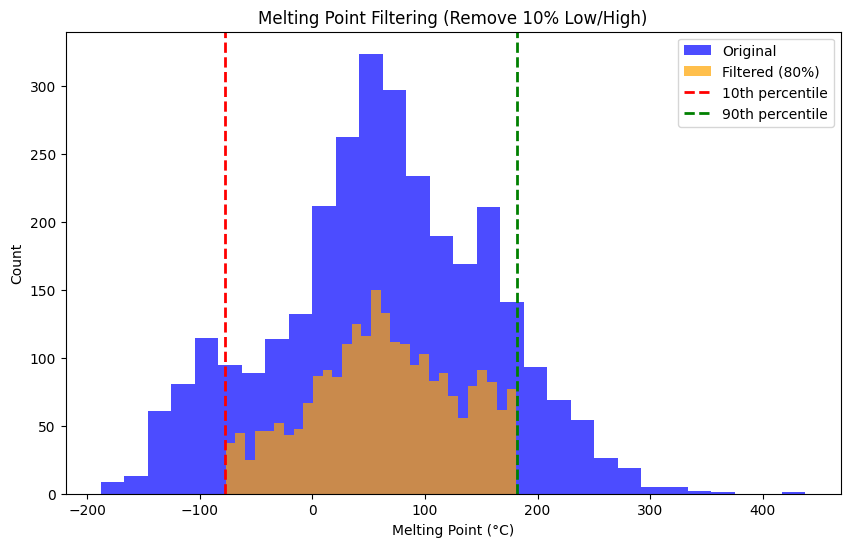

Original: 3025 → Filtered: 2418


In [369]:
plt.figure(figsize=(10, 6))
plt.hist(df_work[mp_col], bins=30, alpha=0.7, label='Original', color='blue')
plt.hist(df_filtered[mp_col], bins=30, alpha=0.7, label='Filtered (80%)', color='orange')
plt.axvline(q10, color='red', ls='--', lw=2, label='10th percentile')
plt.axvline(q90, color='green', ls='--', lw=2, label='90th percentile')
plt.xlabel('Melting Point (°C)')
plt.ylabel('Count')
plt.title('Melting Point Filtering (Remove 10% Low/High)')
plt.legend()
plt.show()

print(f"Original: {len(df_work)} → Filtered: {len(df_filtered)}")


In [370]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



 ANALYZING MolWt


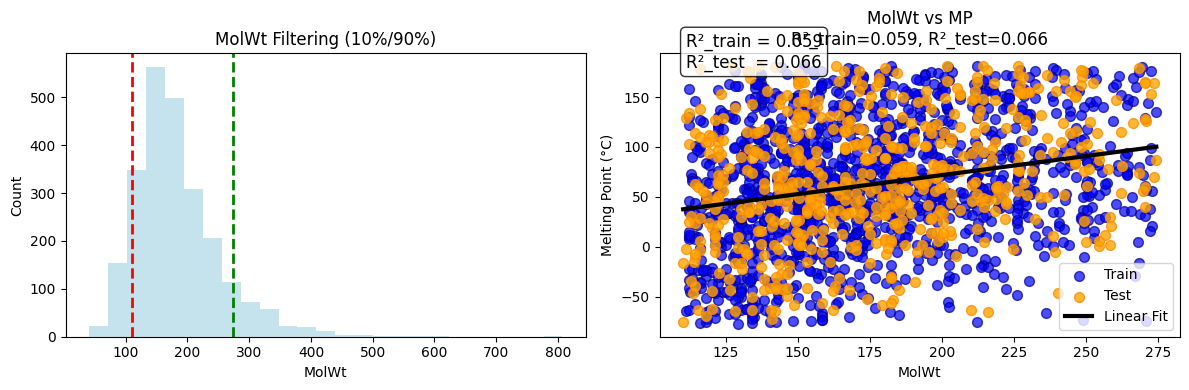

  R² train: 0.059 | test: 0.066 | N=1933

 ANALYZING NumHeavyAtoms


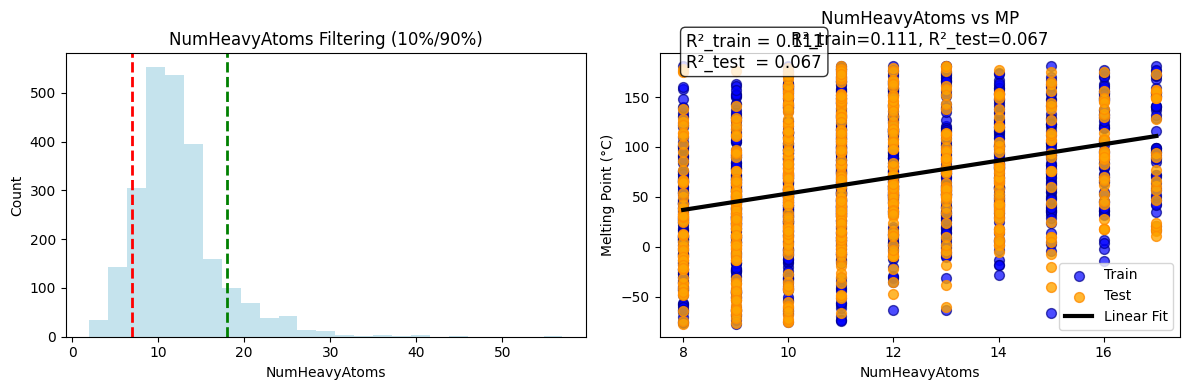

  R² train: 0.111 | test: 0.067 | N=1837

 ANALYZING NumHBD


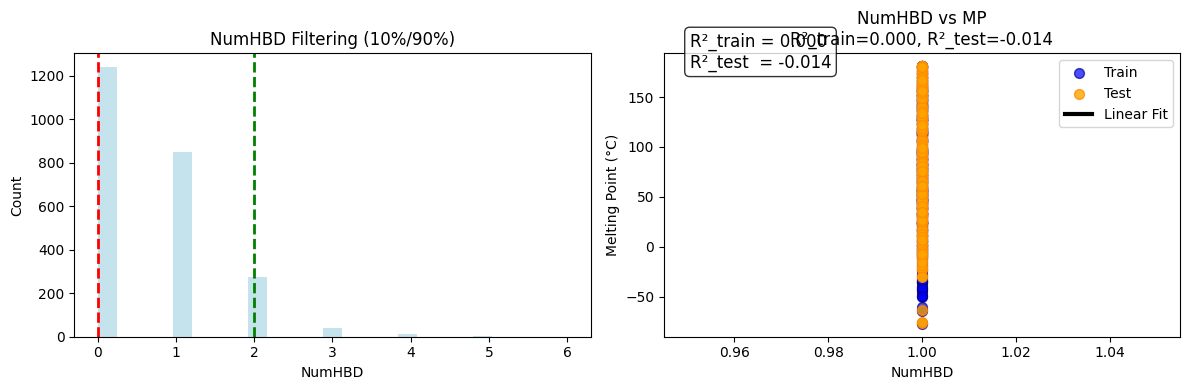

  R² train: 0.000 | test: -0.014 | N=847

 ANALYZING LogP


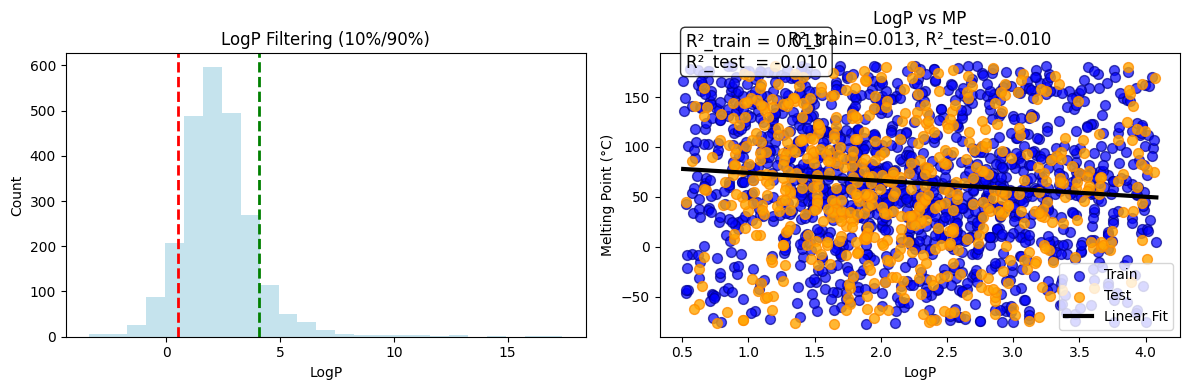

  R² train: 0.013 | test: -0.010 | N=1934

 ANALYZING TPSA


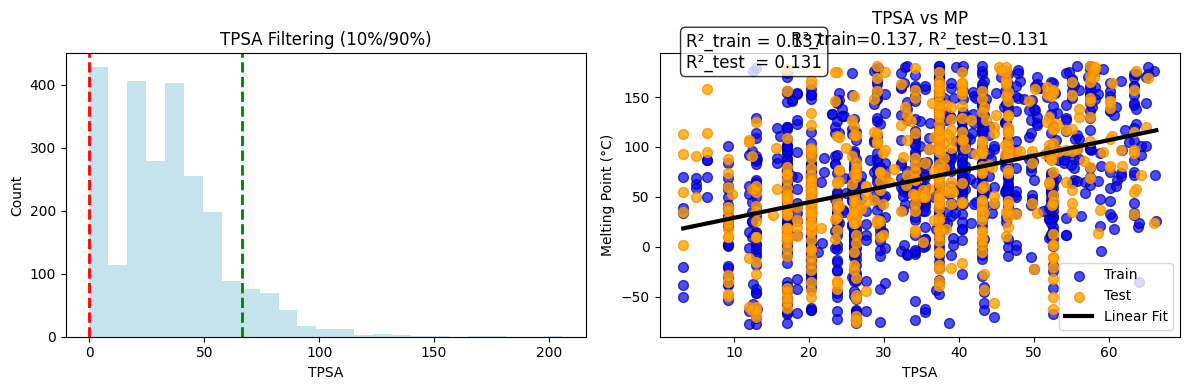

  R² train: 0.137 | test: 0.131 | N=1770


In [371]:
results = []

for i, prop in enumerate(props):
    print(f"\n ANALYZING {prop}")

    # Filter for this property
    df_prop = df_filtered.dropna(subset=[prop, mp_col]).copy()

    # Property 10%/90% filter
    p10 = df_prop[prop].quantile(0.10)
    p90 = df_prop[prop].quantile(0.90)
    df_final = df_prop[(df_prop[prop] > p10) & (df_prop[prop] < p90)].copy()

    if len(df_final) < 20:
        print(f" Skipping {prop} - too few points ({len(df_final)})")
        continue

    # Plot 1: Property filtering histogram
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.hist(df_prop[prop], bins=25, alpha=0.7, color='lightblue')
    plt.axvline(p10, color='red', ls='--', lw=2)
    plt.axvline(p90, color='green', ls='--', lw=2)
    plt.xlabel(prop)
    plt.ylabel('Count')
    plt.title(f'{prop} Filtering (10%/90%)')

    # Plot 2: Regression scatter
    plt.subplot(1, 2, 2)
    X = df_final[[prop]].values
    y = df_final[mp_col].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42+i)

    model = LinearRegression().fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Training points (blue)
    plt.scatter(X_train, y_train, color='blue', alpha=0.7, s=50, label='Train', edgecolors='darkblue')
    # Test points (orange)
    plt.scatter(X_test, y_test, color='orange', alpha=0.8, s=50, label='Test', edgecolors='darkorange')

    # Regression line
    x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    plt.plot(x_line, model.predict(x_line), 'k-', linewidth=3, label='Linear Fit')

    plt.xlabel(prop)
    plt.ylabel('Melting Point (°C)')
    plt.title(f'{prop} vs MP\nR²_train={r2_train:.3f}, R²_test={r2_test:.3f}')

    # R² text box
    plt.text(0.05, 0.95, f'R²_train = {r2_train:.3f}\nR²_test  = {r2_test:.3f}',
             transform=plt.gca().transAxes, fontsize=12,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.legend()
    plt.tight_layout()
    plt.show()

    results.append({'Property': prop, 'R2_train': r2_train, 'R2_test': r2_test})
    print(f"  R² train: {r2_train:.3f} | test: {r2_test:.3f} | N={len(df_final)}")


##Final Result

In [372]:
results_df = pd.DataFrame(results)
print(" FINAL RESULTS (sorted by TEST R²):")
print(results_df.sort_values('R2_test', ascending=False).round(4))

if len(results_df) > 0:
    best = results_df.loc[results_df['R2_test'].idxmax()]
    print(f"\n BEST PROPERTY: {best['Property']} (R²_test = {best['R2_test']:.4f})")


 FINAL RESULTS (sorted by TEST R²):
        Property  R2_train  R2_test
4           TPSA    0.1372   0.1308
1  NumHeavyAtoms    0.1115   0.0673
0          MolWt    0.0593   0.0657
3           LogP    0.0126  -0.0101
2         NumHBD    0.0000  -0.0136

 BEST PROPERTY: TPSA (R²_test = 0.1308)


## For two of the properties from D) (e.g., the ones that correlate best with the melting point), perform RANSAC regression, which is method that takes outliers into account when performing linear regression and does not include them in the final modeling, see here.

In the figure, it should be clear which data points are in inlier set and which are in the outlier set (e.g., by showing them in different colors).

In [373]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


In [374]:
# Getting top 2 properties from results_df (from part D)
if 'results_df' in locals():
    top2 = results_df.nlargest(2, 'R2_test')['Property'].tolist()
else:
    top2 = ["MolWt", "NumHeavyAtoms"]

print(f" Top 2 properties for RANSAC: {top2}")


 Top 2 properties for RANSAC: ['TPSA', 'NumHeavyAtoms']


In [375]:
def ransac_analysis(df_filtered, prop, mp_col):
    """Complete RANSAC analysis for one property"""
    df_prop = df_filtered.dropna(subset=[prop, mp_col]).copy()

    # Prepare data
    X = df_prop[[prop]].values
    y = df_prop[mp_col].values

    # RANSAC with LinearRegression base estimator
    ransac = RANSACRegressor(
        base_estimator=LinearRegression(),
        min_samples=0.5,      # 50% of data for random sampling
        residual_threshold=10, # Adjust based on your data scale (MP in °C)
        max_trials=100
    )
    ransac.fit(X, y)

    # Get inliers/outliers
    inlier_mask = ransac.inlier_mask_
    outlier_mask = ~inlier_mask

    # R² scores
    y_pred_inliers = ransac.predict(X[inlier_mask])
    r2_inliers = r2_score(y[inlier_mask], y_pred_inliers)

    print(f"{prop}: {inlier_mask.sum()} inliers, {outlier_mask.sum()} outliers")
    print(f"R² (inliers only): {r2_inliers:.3f}")

    return ransac, inlier_mask, r2_inliers

# Using filtered data from part D
print("Using df_filtered from part D (MP 10%/90% filtered)")


Using df_filtered from part D (MP 10%/90% filtered)


In [376]:
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

# Getting top 2 properties (from part D results)
if 'results_df' in locals() and len(results_df) > 0:
    top2 = results_df.nlargest(2, 'R2_test')['Property'].tolist()
else:
    top2 = ["MolWt", "NumHeavyAtoms"]
print(f"Top 2 for RANSAC: {top2}")


Top 2 for RANSAC: ['TPSA', 'NumHeavyAtoms']


In [377]:
def ransac_analysis(df, prop, mp_col):
    """RANSAC with CORRECT sklearn parameters"""
    df_prop = df.dropna(subset=[prop, mp_col]).copy()
    X = df_prop[[prop]].values
    y = df_prop[mp_col].values


    ransac = RANSACRegressor(
        estimator=LinearRegression(),
        min_samples=0.5,
        residual_threshold=10,            # °C threshold for melting point outliers
        max_trials=100,
        random_state=42
    )
    ransac.fit(X, y)

    # Inliers/outliers
    inlier_mask = ransac.inlier_mask_
    outlier_mask = ~inlier_mask

    # R² on inliers only
    y_pred_inliers = ransac.predict(X[inlier_mask])
    r2_inliers = r2_score(y[inlier_mask], y_pred_inliers)

    print(f"{prop}: {inlier_mask.sum()}/{len(X)} inliers ({100*inlier_mask.sum()/len(X):.1f}%)")
    print(f"  R²(inliers): {r2_inliers:.3f}")

    return ransac, inlier_mask, r2_inliers


TPSA: 373/2418 inliers (15.4%)
  R²(inliers): 0.971


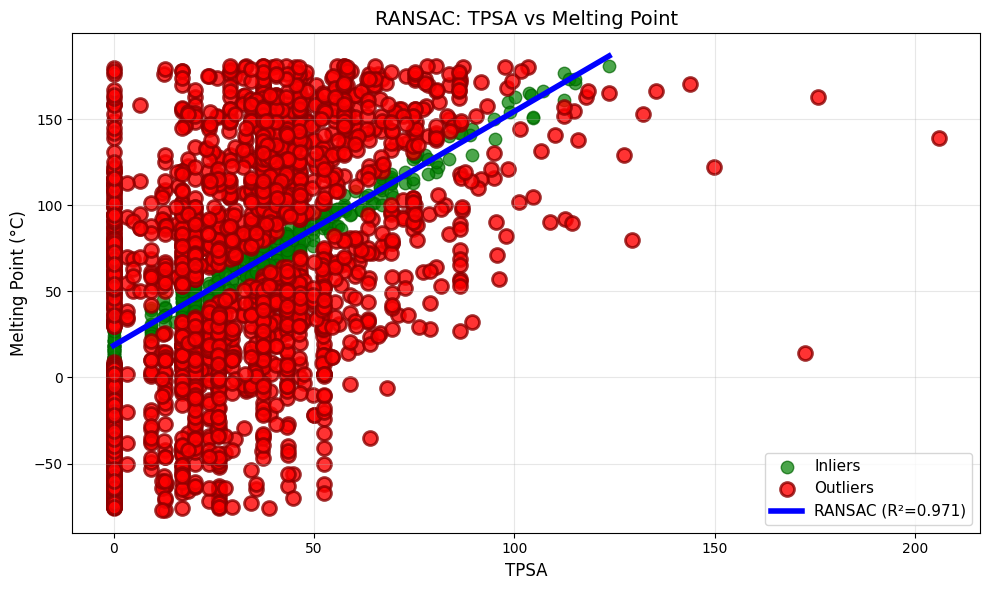

In [378]:
prop1 = top2[0]
ransac1, mask1, r2_1 = ransac_analysis(df_filtered, prop1, mp_col)

# Plot with inliers (green) vs outliers (red)
plt.figure(figsize=(10, 6))
X1 = df_filtered[[prop1]].values
y1 = df_filtered[mp_col].values

plt.scatter(X1[mask1], y1[mask1], color='green', s=80, alpha=0.7,
           edgecolors='darkgreen', linewidth=1, label='Inliers')
plt.scatter(X1[~mask1], y1[~mask1], color='red', s=100, alpha=0.8,
           edgecolors='darkred', linewidth=2, label='Outliers')

# RANSAC line (blue)
inlier_range = X1[mask1]
x_line = np.linspace(inlier_range.min(), inlier_range.max(), 100).reshape(-1, 1)
plt.plot(x_line, ransac1.predict(x_line), 'blue', linewidth=4, label=f'RANSAC (R²={r2_1:.3f})')

plt.xlabel(prop1, fontsize=12)
plt.ylabel('Melting Point (°C)', fontsize=12)
plt.title(f'RANSAC: {prop1} vs Melting Point', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


NumHeavyAtoms: 348/2418 inliers (14.4%)
  R²(inliers): 0.950


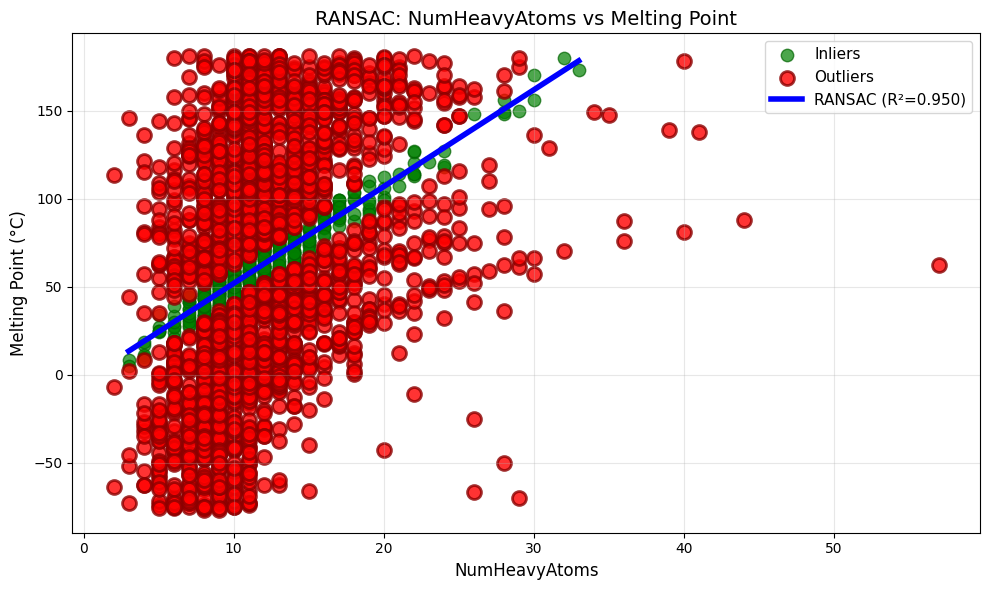

In [379]:
prop2 = top2[1]
ransac2, mask2, r2_2 = ransac_analysis(df_filtered, prop2, mp_col)

plt.figure(figsize=(10, 6))
X2 = df_filtered[[prop2]].values
y2 = df_filtered[mp_col].values

plt.scatter(X2[mask2], y2[mask2], color='green', s=80, alpha=0.7,
           edgecolors='darkgreen', linewidth=1, label='Inliers')
plt.scatter(X2[~mask2], y2[~mask2], color='red', s=100, alpha=0.8,
           edgecolors='darkred', linewidth=2, label='Outliers')

inlier_range = X2[mask2]
x_line = np.linspace(inlier_range.min(), inlier_range.max(), 100).reshape(-1, 1)
plt.plot(x_line, ransac2.predict(x_line), 'blue', linewidth=4, label=f'RANSAC (R²={r2_2:.3f})')

plt.xlabel(prop2, fontsize=12)
plt.ylabel('Melting Point (°C)', fontsize=12)
plt.title(f'RANSAC: {prop2} vs Melting Point', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [380]:
print(" RANSAC vs Ordinary Linear Regression")
print("=="*60)

for i, prop in enumerate(top2):
    ransac, mask, r2_ransac = ransac_analysis(df_filtered, prop, mp_col)

    # Compare with ordinary LR on same data
    X = df_filtered[[prop]].values
    y = df_filtered[mp_col].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    lr = LinearRegression().fit(X_train, y_train)
    r2_lr_test = r2_score(y_test, lr.predict(X_test))

    print(f"{prop:15s}: RANSAC R²={r2_ransac:.3f} ({mask.sum()} inliers)")
    print(f"{'':15s}:   Ordinary LR R²={r2_lr_test:.3f} (all data)")
    print()


 RANSAC vs Ordinary Linear Regression
TPSA: 373/2418 inliers (15.4%)
  R²(inliers): 0.971
TPSA           : RANSAC R²=0.971 (373 inliers)
               :   Ordinary LR R²=0.291 (all data)

NumHeavyAtoms: 348/2418 inliers (14.4%)
  R²(inliers): 0.950
NumHeavyAtoms  : RANSAC R²=0.950 (348 inliers)
               :   Ordinary LR R²=0.161 (all data)



### Task 2 - Optional 5 points

Here we will consider a dataset of two variables $x$ and $y$ sampled from a two-dimensional probability density $P(x,y)$ that is unknown.

The dataset is given as a time series in the file `Dataset_RotatedWQ-Potential.data`.

The main task is to perform a Gaussian Mixture Model analysis on this two-dimensional dataset.

#### A)
Plot the dataset, both the time series and also a scatter plot for the $x$ and $y$ variables.

Looking at the scatter plot, how many Gaussian components do you think are needed in the Gaussian Mixture Model analysis?

#### B)
Using Seaborn (or scikit-learn) estimate the two-dimensional probability density $P(x,y)$ using kernel density estimation.

#### C)
Perform a Gaussian Mixture Model analysis for a different number of components, and obtain the Bayesian information criterion (bic) and Akaike information criterion (aic) values and based on them identify the optimal number of components (remember that for both a lower value is better).

#### D)
For the optimal number of components, perform a final Gaussian Mixture Model analysis that you will analyze.

- What is the weight of each Gaussian components.

- What is the percentage of samples that are hard classifed to each cluster.

- Make a scatter plot that shows how the samples are hard classifed to each cluster. In this plot, indicate the center of each Gaussian components.

- Make figures that shows how the samples are soft classifed to each cluster (e.g., the probablity that they belong to a given cluster). In each plot, indicate the center of corresponding Gaussian components.

- Plot a two-dimensional surface of the $P(x,y)$ estimated by the Gaussian Mixture Model. How does this compare to the KDE plot from B)?


In [381]:
# Bash script to download all the dataset. Don't worry if you don't understand it
%%bash

url="https://raw.githubusercontent.com/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/refs/heads/main/Assignment-2/"
dataset_filename="Dataset_RotatedWQ-Potential.data"

rm -f ${dataset_filename}

wget ${url}/${dataset_filename} &> /dev/null

ls



Bradley_Dataset_with_RDKit_Descriptors.csv
BradleyDoublePlusGoodMeltingPointDataset.csv
Bradley_RDKit_descriptors_clean.csv
Dataset_RotatedWQ-Potential.data
sample_data


##A

In [382]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [383]:
df=pd.read_csv("Dataset_RotatedWQ-Potential.data")

In [384]:
df.head(6)

,#! FIELDS time p.x p.y
0,0.000000 -1.174000 1.477000
1,1.000000 -1.623929 0.606506
2,2.000000 -1.888162 0.751783
3,3.000000 -1.726908 0.444591
4,4.000000 -1.553645 0.260369
5,5.000000 -1.677539 0.801004


In [385]:
!head Dataset_RotatedWQ-Potential.data

#! FIELDS time p.x p.y
 0.000000 -1.174000 1.477000
 1.000000 -1.623929 0.606506
 2.000000 -1.888162 0.751783
 3.000000 -1.726908 0.444591
 4.000000 -1.553645 0.260369
 5.000000 -1.677539 0.801004
 6.000000 -2.042513 0.999498
 7.000000 -1.518738 1.228479
 8.000000 -1.520207 0.469390


In [386]:
# Loading the data (2 columns: x, y)
df = np.loadtxt("Dataset_RotatedWQ-Potential.data")
x = df[:, 0]
y = df[:, 1]

print(f"Dataset shape: {df.shape}")
print(f"x range: {x.min():.3f} to {x.max():.3f}")
print(f"y range: {y.min():.3f} to {y.max():.3f}")


Dataset shape: (10001, 3)
x range: 0.000 to 10000.000
y range: -2.730 to 2.578


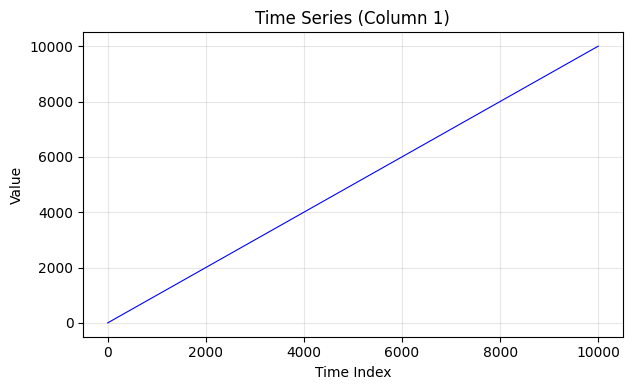

In [387]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x, 'b-', linewidth=0.8)
plt.title('Time Series (Column 1)')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


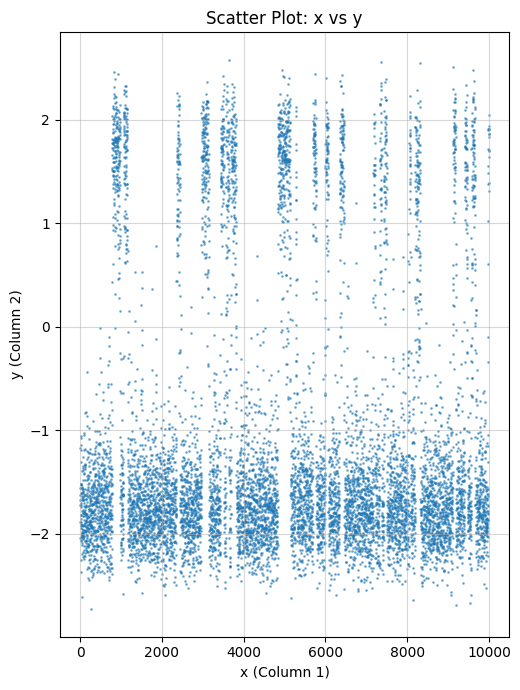

In [388]:
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 2)
plt.scatter(x, y, s=1, alpha=0.5)
plt.xlabel('x (Column 1)')
plt.ylabel('y (Column 2)')
plt.title('Scatter Plot: x vs y')
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()


n_components=2: silhouette_score=-0.024
n_components=3: silhouette_score=0.276
n_components=4: silhouette_score=-0.380
n_components=5: silhouette_score=-0.446


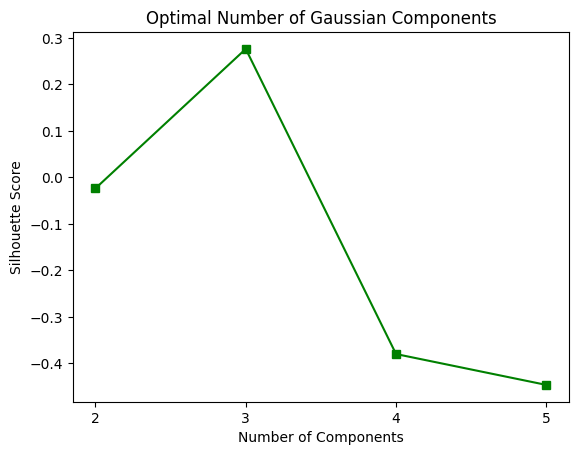

In [389]:
from sklearn.mixture import GaussianMixture # GaussianMixture finds clusters in your rotated Gaussian data
from sklearn.metrics import silhouette_score # silhouette_score tells you "how many clusters = best fit"
import matplotlib.pyplot as plt
import seaborn as sns

X = df
scores = []
for n in range(2, 6):  # Start from 2, not 1
    gmm = GaussianMixture(n_components=n, random_state=42).fit(X)
    score = silhouette_score(X, gmm.predict(X))
    scores.append(score)
    print(f"n_components={n}: silhouette_score={score:.3f}")

plt.plot(range(2, 6), scores, 'gs-') # 'gs-'style string,bo-,cD- so on..
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.title('Optimal Number of Gaussian Components')
plt.xticks(range(2, 6))
plt.show()


##B. Using Seaborn (or scikit-learn) estimate the two-dimensional probability density  𝑃(𝑥,𝑦)  using kernel density estimation.



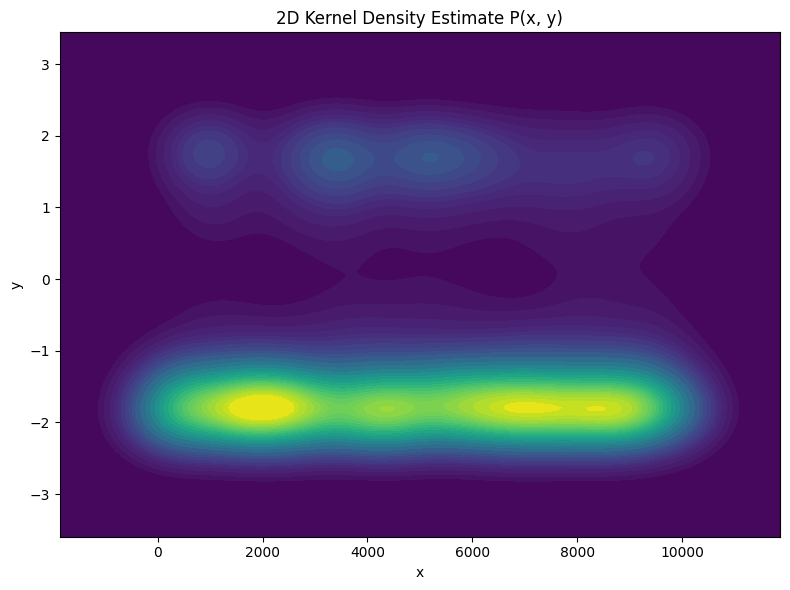

In [390]:
data_2d = df[:, :2]

# Putting into a Dataframe for Seaborn
df_plot = pd.DataFrame(data_2d, columns=["x", "y"])

plt.figure(figsize=(8, 6))

# 2D kernel density estimate of P(x,y)
sns.kdeplot(
    data=df_plot,
    x="x",
    y="y",
    fill=True,        # filled contours = density
    cmap="viridis",   # color map
    levels=30,        # number of contour levels
    thresh=0.0
)

plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Kernel Density Estimate P(x, y)")
plt.tight_layout()
plt.show()


##C. Perform a Gaussian Mixture Model analysis for a different number of components, and obtain the Bayesian information criterion (bic) and Akaike information criterion (aic) values and based on them identify the optimal number of components (remember that for both a lower value is better).

In [391]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

In [392]:
# Using first 2 columns of data (x, y)
X = df[:, :2]

# Testing different number of components
n_components_range = range(1, 11)
aic = []
bic = []
models = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X)
    aic.append(gmm.aic(X))
    bic.append(gmm.bic(X))
    models.append(gmm)

    print(f"n_components={n}: AIC={gmm.aic(X):.2f}, BIC={gmm.bic(X):.2f}")


n_components=1: AIC=221989.03, BIC=222025.08
n_components=2: AIC=208878.88, BIC=208958.19
n_components=3: AIC=207492.64, BIC=207615.22
n_components=4: AIC=207385.97, BIC=207551.81
n_components=5: AIC=207623.07, BIC=207832.17
n_components=6: AIC=207342.29, BIC=207594.66
n_components=7: AIC=205445.20, BIC=205740.83
n_components=8: AIC=205130.09, BIC=205468.98
n_components=9: AIC=204493.74, BIC=204875.90
n_components=10: AIC=203958.11, BIC=204383.52


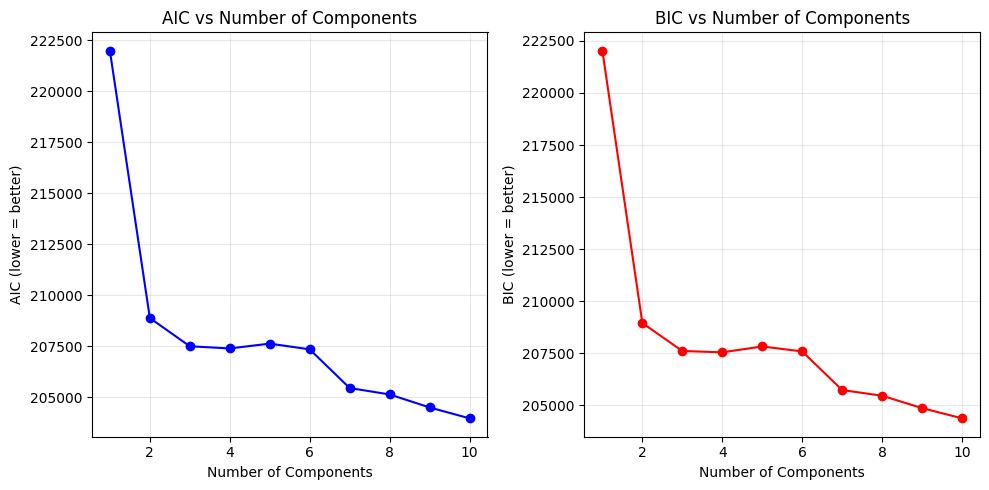

In [393]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(n_components_range, aic, 'bo-', label='AIC')
plt.xlabel('Number of Components')
plt.ylabel('AIC (lower = better)')
plt.title('AIC vs Number of Components')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(n_components_range, bic, 'ro-', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('BIC (lower = better)')
plt.title('BIC vs Number of Components')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [394]:
# Finding minimum AIC and BIC
best_aic_idx = np.argmin(aic)
best_bic_idx = np.argmin(bic)

print(f"\nOptimal components:")
print(f"AIC minimum: {best_aic_idx + 1} components (AIC = {aic[best_aic_idx]:.2f})")
print(f"BIC minimum: {best_bic_idx + 1} components (BIC = {bic[best_bic_idx]:.2f})")

# Using the BIC optimal model (usually preferred)
optimal_model = models[best_bic_idx]
labels = optimal_model.predict(X)

print(f"Recommended: {best_bic_idx + 1} components (BIC)")



Optimal components:
AIC minimum: 10 components (AIC = 203958.11)
BIC minimum: 10 components (BIC = 204383.52)
Recommended: 10 components (BIC)


##C. For the optimal number of components, perform a final Gaussian Mixture Model analysis that you will analyze.

What is the weight of each Gaussian components.

What is the percentage of samples that are hard classifed to each cluster.

Make a scatter plot that shows how the samples are hard classifed to each cluster. In this plot, indicate the center of each Gaussian components.

Make figures that shows how the samples are soft classifed to each cluster (e.g., the probablity that they belong to a given cluster). In each plot, indicate the center of corresponding Gaussian components.

Plot a two-dimensional surface of the  𝑃(𝑥,𝑦)  estimated by the Gaussian Mixture Model. How does this compare to the KDE plot from B)?

# 1. WEIGHTS of each Gaussian component

In [395]:
X = df[:, :2]
optimal_model = GaussianMixture(n_components=2, random_state=42)
optimal_model.fit(X)

# 1. WEIGHTS of each Gaussian component
weights = optimal_model.weights_
print("Component Weights:", weights)
print("Percentages:", [f"{w*100:.1f}%" for w in weights])

Component Weights: [0.2206718 0.7793282]
Percentages: ['22.1%', '77.9%']


# 2. % of samples that are hard classification percentages

In [396]:
# 2. % of samples that are hard classification percentages
hard_labels = optimal_model.predict(X)
cluster_counts = np.bincount(hard_labels)
cluster_percentages = cluster_counts / len(X) * 100
print("Hard Classification %:", cluster_percentages)


Hard Classification %: [21.69783022 78.30216978]


##3.Scatter plot

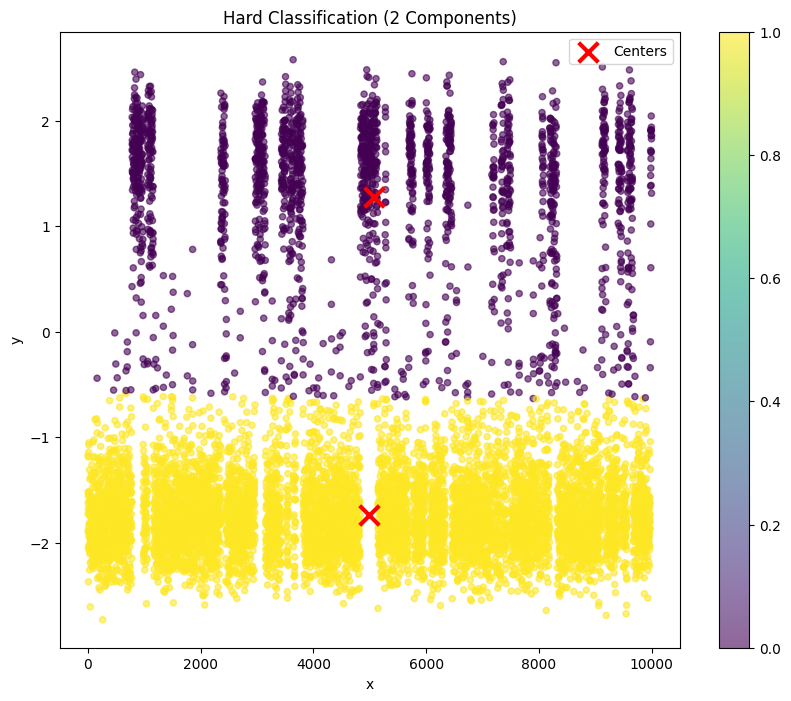

In [397]:

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=hard_labels, cmap='viridis', s=20, alpha=0.6)
centers = optimal_model.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='x', linewidths=3, label='Centers')
plt.colorbar(scatter)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Hard Classification (2 Components)')
plt.legend()
plt.show()


##4 and 5. Creating meshgrid for density surface

In [398]:
##4 and 5. Creating meshgrid for density surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]

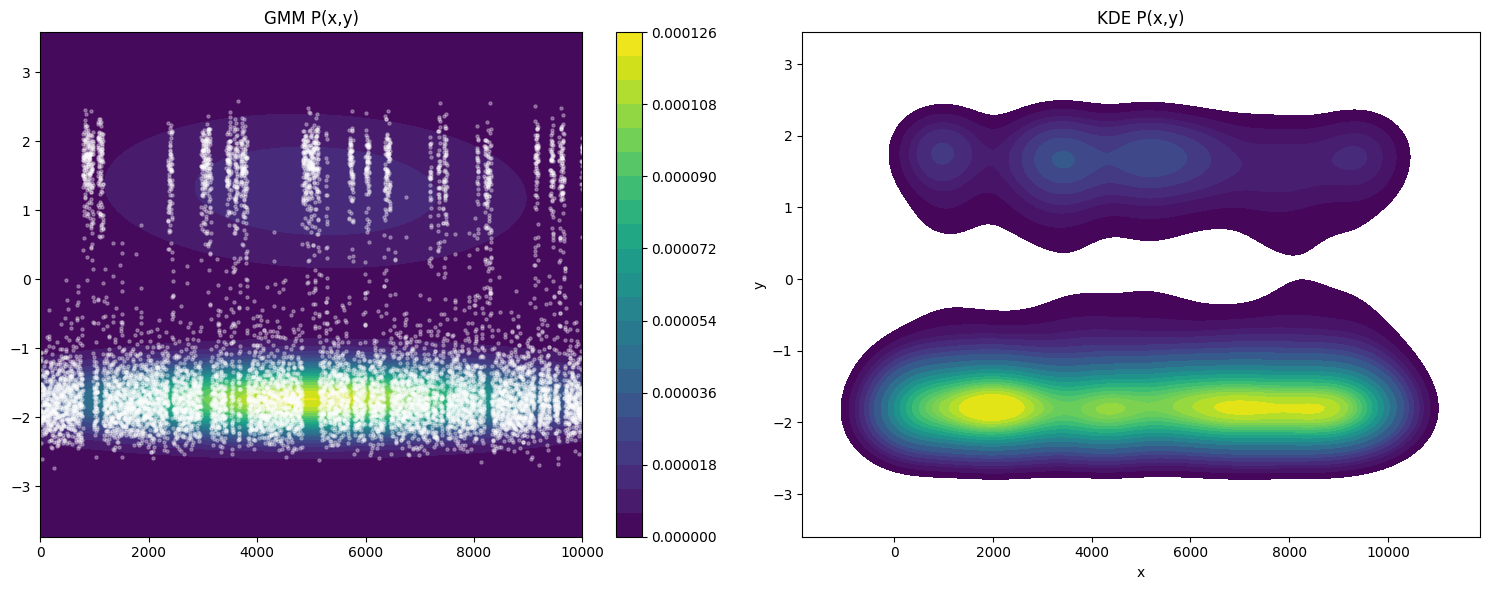

In [399]:
# GMM density
log_prob = optimal_model.score_samples(X_grid)
prob_gmm = np.exp(log_prob).reshape(xx.shape)

# Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# GMM P(x,y)
im1 = ax1.contourf(xx, yy, prob_gmm, levels=20, cmap='viridis')
ax1.scatter(X[:, 0], X[:, 1], s=5, alpha=0.3, color='white')
ax1.set_title('GMM P(x,y)')
plt.colorbar(im1, ax=ax1)

# KDE P(x,y)
sns.kdeplot(data=pd.DataFrame(X, columns=['x','y']), x='x', y='y', fill=True,
            ax=ax2, cmap='viridis', levels=20)
ax2.set_title('KDE P(x,y)')

plt.tight_layout()
plt.show()
